# nn.Module 
# Comparing with Function，you don't need to add a backward function into the net when you use nn.Module

In [1]:
import torch as t
from torch import nn
from torch.autograd import Variable as V
class Linear(nn.Module):
    def __init__(self,in_feature, out_feature):
        super(Linear, self).__init__() # nn.Module.__init__(self)
        self.w = nn.Parameter(t.randn(in_feature, out_feature))
        self.b = nn.Parameter(t.randn(out_feature))
    def forward(self, x):
        x = x.mm(self.w)
        return x + self.b.expand_as(x)

In [2]:
layer = Linear(4, 3) # size of input is 4 & size of output is 3
input = V(t.randn(2, 4))
output = layer(input)
print(input, output)

tensor([[-1.5656, -0.5154, -0.2071,  0.0115],
        [ 0.4926,  0.7133, -0.5793, -1.0312]]) tensor([[-2.9311,  1.0907, -1.3244],
        [ 1.1805, -0.2369,  1.0255]], grad_fn=<AddBackward0>)


In [3]:
for name, parameter in layer.named_parameters():
    print(name, parameter)

w Parameter containing:
tensor([[ 1.8249, -0.3653,  0.2899],
        [ 0.8147,  0.0684,  0.2629],
        [-0.2376,  0.2016, -0.8294],
        [ 0.7035,  0.5608, -1.0754]], requires_grad=True)
b Parameter containing:
tensor([ 0.2884,  0.5893, -0.8944], requires_grad=True)


# Multilayer Perceptron (MLP)
# nn.Module
# MLP includes onr input_layer & one output_layer & several hidden_layers

In [4]:
class Perceptron(nn.Module):
    def __init__(self, in_f, hidden_f, out_f):
        nn.Module.__init__(self)
        self.layer1 = Linear(in_f, hidden_f)
        self.layer2 = Linear(hidden_f, out_f)
    def forward(self, x):
        x = self.layer1(x)
        x = t.sigmoid(x) # activated function
        return self.layer2(x)

In [5]:
perceptron = Perceptron(3, 4, 1) # size_input = 3, size_hidden = 4, size_output = 1
for name, parameter in perceptron.named_parameters():
    print(name, parameter.size())

layer1.w torch.Size([3, 4])
layer1.b torch.Size([4])
layer2.w torch.Size([4, 1])
layer2.b torch.Size([1])


# Convolution Net
# used to solve image problem
# Convolution layer & Pool layer & fully connected layer

1


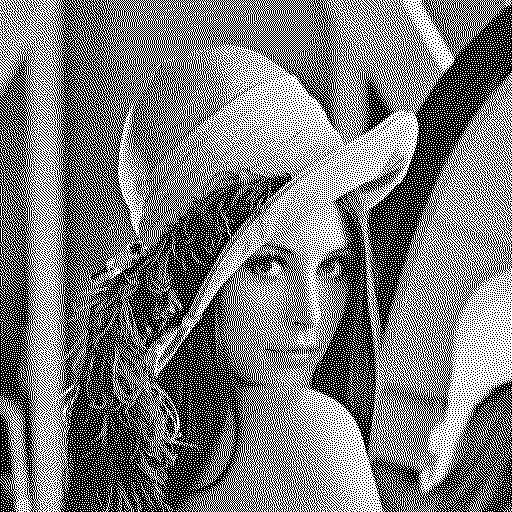

In [6]:
from PIL import Image
from torchvision.transforms import ToTensor, ToPILImage
to_tensor = ToTensor() # img to tensor
to_pil = ToPILImage() 
lena = Image.open(r'C:\Users\wwod\Desktop\lena.png')
lena = lena.convert('1')
print(lena.mode)
lena

# nn.Conv2d(in_channels, out_channels, kernel_size, stride = 1, padding = 0, dilation = 1,  groups = 1, bias = True, padding_mode = 'zeros')
# in_channels: 输入张量的channel数
# out_channels: 输出张量的channel数
# kernel_size: 卷积核大小，有两种表示方式：1.kernel_size = 5,表示5x5；2.kernel_size = (3, 5),表示3x5
# padding：表示填充，默认为0，表示填充，padding_mode 即填充模式，默认为0
# groups: 决定了是否采用分组卷积，现在用的比较多的是groups = in_channel。当groups = in_channel时，是在做的depth-wise conv的
# dilation: 这个参数决定了是否采用空洞卷积，默认为1（不采用）。从中文上来讲，这个参数的意义从卷积核上的一个参数到另一个参数需要走过的距离，那当然默认是1了，毕竟不可能两个不同的参数占同一个地方吧(为0)
# bias: 即是否要添加偏置参数作为可学习参数的一个，默认为True

tensor([[-0.1111, -0.1111, -0.1111],
        [-0.1111, -0.1111, -0.1111],
        [-0.1111, -0.1111, -0.1111]])
tensor([[-0.1111, -0.1111, -0.1111],
        [-0.1111,  1.0000, -0.1111],
        [-0.1111, -0.1111, -0.1111]])
tensor([[[[-0.1111, -0.1111, -0.1111],
          [-0.1111,  1.0000, -0.1111],
          [-0.1111, -0.1111, -0.1111]]]])


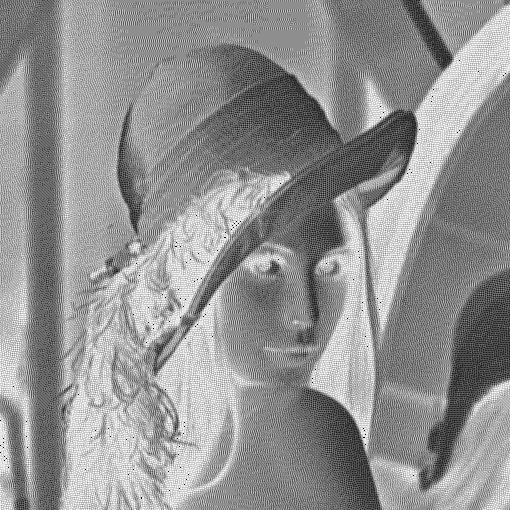

In [7]:
# input is a batch & batch_size = 1
input = to_tensor(lena).unsqueeze(0)
# 锐化卷积核
kernel = t.ones(3, 3)/-9.
print(kernel)
kernel[1][1] = 1
print(kernel)
conv = nn.Conv2d(1, 1, (3, 3), 1, bias = False)
conv.weight.data = kernel.view(1, 1, 3, 3)
print(kernel.view(1, 1, 3, 3))
out = conv(V(input))
to_pil(out.data.squeeze(0)) # tensor to image

# nn.AvgPool2d()

In [8]:
# 池化层没有可学习参数，其weight是固定的
pool = nn.AvgPool2d(3,3)
list(pool.parameters())

[]

pic after pool <PIL.Image.Image image mode=L size=170x170 at 0x1E2FEAC4C90>


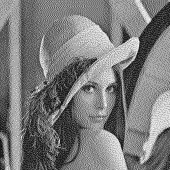

In [9]:
out = pool(V(input))
print('pic after pool', to_pil(out.data.squeeze(0)) )
to_pil(out.data.squeeze(0))

# 除了卷积层和池化层，深度学习还会用到以下几个层
# Linear: 全连接层
# BatchNorm：批规范化层， 分为1D、2D和3D。除了标准的BatchNorm之外，还有在风格迁移中常用到的InstanceNorm层
# Dropout：dropout层，用来防止拟合，同样分为1D、2D和3D
# 举例 ： 

In [10]:
# Linear 
# input：batch_size = 2, dim = 3
input = V(t.randn(2, 3))
linear = nn.Linear(3, 4)
h = linear(input)
print('input:', input, '\n','h:', h)

input: tensor([[ 0.3077, -0.4932, -1.5928],
        [-0.5655, -0.5847, -0.5398]]) 
 h: tensor([[-0.3697, -0.1062,  0.1804,  0.4210],
        [-0.1903, -0.0846,  0.0865,  0.5034]], grad_fn=<AddmmBackward0>)


In [11]:
# BatchNorm 
# 4 channels , 初始化标准差为4， 均值为0
bn = nn.BatchNorm1d(4)
bn.weight.data = t.ones(4) * 4
bn.bias.data = t.zeros(4)
print(bn.weight.data, bn.bias.data)
bn_out = bn(h)
# 注意输出的均值和方差
# 方差是标准差的平方， 计算无偏方差分母会减一
# 使用unbiased = False， 分母不减一
bn_out.mean(0), bn_out.var(0, unbiased = False)

tensor([4., 4., 4., 4.]) tensor([0., 0., 0., 0.])


(tensor([ 9.5367e-07,  0.0000e+00, -4.7684e-07,  1.9073e-06],
        grad_fn=<MeanBackward1>),
 tensor([15.9801, 14.7336, 15.9277, 15.9061], grad_fn=<VarBackward0>))

In [12]:
# Dropout
# 每个元素以0.5的概率舍弃
dropout = nn.Dropout(0.5)
o = dropout(bn_out)
o #有一半左右的数变为0

tensor([[-7.9950, -7.6769,  7.9819, -7.9765],
        [ 0.0000,  0.0000, -7.9819,  7.9765]], grad_fn=<MulBackward0>)

# 激活函数 
# ReLU

In [13]:
relu = nn.ReLU(inplace = True) # inplace : output will cover input
input = V(t.randn(2, 3))
print(input)
output = relu(input)
print(output)

tensor([[ 1.7616,  1.5268,  0.0208],
        [ 0.5007, -0.6763,  2.1329]])
tensor([[1.7616, 1.5268, 0.0208],
        [0.5007, 0.0000, 2.1329]])


# 简化 forward 传播的方法
# Sequential 的 3 种写法

In [14]:
net1 = nn.Sequential()
net1.add_module('conv', nn.Conv2d(3, 3, 3))
net1.add_module('batchnorm', nn.BatchNorm2d(3))
net1.add_module('actication_layer', nn.ReLU())

net2  = nn.Sequential(
    nn.Conv2d(3, 3, 3),
    nn.BatchNorm2d(3),
    nn.ReLU()
)
from collections import OrderedDict
net3 = nn.Sequential(OrderedDict([
    ('conv1', nn.Conv2d(3, 3, 3)),
    ('bn1', nn.BatchNorm2d(3)),
    ('relu1', nn.ReLU())
]))

print('net1:', net1)
print('net2:', net2)
print('net3:', net3)

net1: Sequential(
  (conv): Conv2d(3, 3, kernel_size=(3, 3), stride=(1, 1))
  (batchnorm): BatchNorm2d(3, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (actication_layer): ReLU()
)
net2: Sequential(
  (0): Conv2d(3, 3, kernel_size=(3, 3), stride=(1, 1))
  (1): BatchNorm2d(3, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (2): ReLU()
)
net3: Sequential(
  (conv1): Conv2d(3, 3, kernel_size=(3, 3), stride=(1, 1))
  (bn1): BatchNorm2d(3, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu1): ReLU()
)


# 损失函数 -- Loss Function

In [15]:
# batch_size = 3 , 计算对应每个类别的分数（只有两个类别）
score = V(t.randn(3, 2))
print('score:', score)
# 三个样本分别属于1，0，1类，label 必须是LongTensor
label = V(t.Tensor([1, 0, 1])).long()
print('label:', label)

# loss与普通的layer无差异
criterion = nn.CrossEntropyLoss(reduction = "none")
loss = criterion(score, label)
loss

score: tensor([[-0.5164, -0.8823],
        [-0.0902,  0.1408],
        [-0.0388, -0.5252]])
label: tensor([1, 0, 1])


tensor([0.8927, 0.8153, 0.9656])

# 搭建ResNet

In [16]:
from torch.nn import functional as F
'''
实现子module: Residual Block
'''
class ResidualBlock(nn.Module):
    def __init__(self, inchannel, outchannel, stride = 1, shortcut = None):
        super(ResidualBlock, self).__init__()
        self.left = nn.Sequential(
            nn.Conv2d(inchannel, outchannel, 3, stride, 1, bias = False),
            nn.BatchNorm2d(outchannel),
            nn.ReLU(inplace = True),
            nn.Conv2d(outchannel, outchannel, 3, 1, 1, bias = False),
            nn.BatchNorm2d(outchannel)
        )
        self.right = shortcut
    def forward(self, x):
        out = self.left(x)
        residual = x if self.right is None else self.right(x)
        out += residual
        return F.relu(out)
'''
实现主module: ResNet34
ResNet34包含多个layer, 每个layer又包含多个residual block
用子module实现residual block, 用_make_layer函数实现layer
'''
class ResNet(nn.Module):
    def __init__(self, num_classes = 1000):
        super(ResNet, self).__init__()
        # 前几层图像转换
        self.pre = nn.Sequential(
            nn.Conv2d(3, 64, 7, 2, 3, bias = False),
            nn.BatchNorm2d(64),
            nn.ReLU(inplace = True),
            nn.MaxPool2d(3, 2, 1)
        )
        # 重复的layer，分别有3，4，6，3个residual block
        self.layer1 = self._make_layer(64, 128, 3)
        self.layer2 = self._make_layer(128, 256, 4, stride = 2)
        self.layer3 = self._make_layer(256, 512, 6, stride = 2)
        self.layer4 = self._make_layer(512, 512, 3, stride = 2)
        
        # 分类用的全连接
        self.fc = nn.Linear(512, num_classes)
        
    def _make_layer(self, inchannel, outchannel, block_num, stride = 1):
        '''
        构建layer,包含多个residual block
        '''
        shortcut = nn.Sequential(
            nn.Conv2d(inchannel, outchannel, 1, stride, bias = False),
            nn.BatchNorm2d(outchannel)
        )
        layers = []
        layers.append(ResidualBlock(inchannel, outchannel, stride, shortcut))
        
        for i in range(1, block_num):
            layers.append(ResidualBlock(outchannel, outchannel))
        return nn.Sequential(*layers)
    
    def forward(self, x):
        x = self.pre(x)
        
        x = self.layer1(x)
        x = self.layer2(x)
        x = self.layer3(x)
        x = self.layer4(x)
        
        x = F.avg_pool2d(x, 7)
        x = x.view(x.size(0), -1)
        return self.fc(x)

In [19]:
model = ResNet()
input = t.autograd.Variable(t.randn(1, 3, 224, 224))
o = model(input)
o

tensor([[-5.6734e-01, -3.9685e-01, -3.4628e-01, -1.1105e-01, -3.2761e-01,
          8.6116e-01,  2.8768e-01,  5.8781e-01,  7.0834e-01, -1.0971e-01,
         -4.9392e-01, -7.3004e-02,  2.4945e-02, -3.9264e-01, -1.8795e-01,
          3.0430e-01, -1.5865e+00,  1.6898e-01,  1.1835e-01,  4.1743e-01,
         -1.1793e-02, -2.1857e-01,  1.4052e-01,  4.3010e-01, -3.1499e-01,
         -3.0696e-01,  3.2172e-02,  5.2134e-02, -1.2721e+00,  1.0149e-01,
         -1.4234e-01, -4.3972e-01,  2.8869e-02,  5.7187e-01, -6.2135e-01,
         -8.7994e-01,  6.6700e-01, -4.6856e-02,  1.3085e-01,  3.9179e-01,
          9.4974e-01, -2.2273e-01,  9.3018e-01, -1.3091e+00,  5.8824e-01,
         -8.8335e-01,  1.8225e-02, -1.2645e-01,  4.4346e-02, -2.7931e-01,
          1.4087e-01,  3.3754e-01, -2.7589e-01, -6.1141e-01,  4.2621e-01,
          1.3384e+00, -4.0912e-01, -7.2469e-03, -3.9803e-02, -6.7588e-01,
          4.7602e-01,  4.0011e-01, -4.2880e-01,  5.7223e-01,  2.8072e-01,
         -2.4857e-01, -7.3465e-02,  2.

In [18]:
from torchvision import models
model = models.resnet34()
p = model(input)
p

tensor([[-3.6125e-01, -5.5705e-01,  5.0731e-01, -3.2708e-01, -2.1848e-01,
          6.3844e-01, -4.9333e-01,  1.4724e-01,  1.5023e-01,  1.0549e-01,
          1.4144e+00,  8.9842e-02, -2.7743e-01,  1.2459e-01,  7.0031e-01,
         -1.5426e+00,  8.4326e-01,  4.5131e-01, -4.4044e-01,  1.4436e+00,
         -6.8114e-02,  4.5559e-01,  8.7405e-01,  3.3472e-01, -1.5652e+00,
          4.6835e-02,  2.2565e-01,  5.7757e-01, -3.2218e-02, -3.7246e-01,
         -5.3500e-01, -2.3496e-01, -1.3562e-01, -7.0580e-01,  5.3424e-01,
         -7.2882e-01,  3.1558e-01, -1.1272e-01, -5.6889e-02, -3.0618e-01,
         -6.0394e-01, -1.0796e+00,  7.9949e-02,  9.6215e-01,  5.3544e-01,
          1.0793e-01,  5.6414e-01, -1.1528e+00,  2.8703e-01, -5.1144e-01,
         -5.6959e-01, -5.5052e-02, -5.9240e-01,  6.2296e-01, -3.7928e-01,
          9.3561e-01, -1.3450e+00,  1.3121e+00,  6.6316e-02,  8.3409e-01,
          7.9724e-02,  1.3403e-01,  1.3678e+00,  8.8846e-02, -5.7839e-01,
         -4.0446e-01, -4.3210e-02,  9.